# Телеметрия апрель 2021

In [2]:
!pwd
!date

/home/alena/SCIENCE/SIT/Analysis/Telemetry
Пт май 21 00:54:21 MSK 2021


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [4]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [7]:
month = 4
dirname = '/home/alena/SCIENCE/SIT/Data/Data.params/Telemetry/every_min/'
filename = "2021_04_all_dbg_params.dat"
data = pd.read_csv(dirname+filename, index_col=None, sep='\s+')
print(data.shape)
#print(data.columns)
data.head(2)

(23139, 20)


,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,Imos,Tpow,U5,Uac,Icom,Tbot,Ttop,Freq,Num,flight
0,2021,3,31,15:13:38,94.88,25.5,94.55,-5.8,4.2,0.0,0.005,36.50,5.16,18.93,0.84,26.9,23.1,1.0,331.0,NaN
1,2021,3,31,15:14:39,94.87,25.4,94.54,-5.9,4.2,0.0,0.000,37.25,5.16,18.94,0.80,26.6,23.2,2.0,331.0,NaN


## Plot

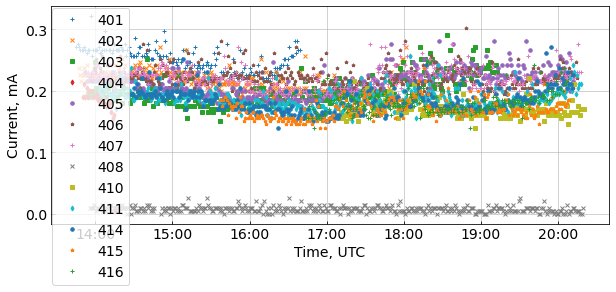

In [10]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array #[array.month == month]
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        fig, ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        key=int(key)
        ax.plot(x, y, plcol[i%len(plcol)], label=key)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Imos", "Current, mA")    

## Plot shared axis

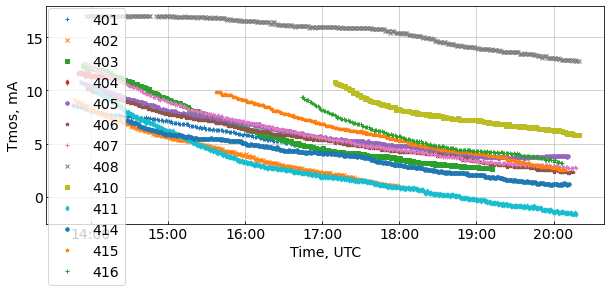

In [11]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array #[array.month == month]
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=str(int(key)))
        i += 1

    plt.xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    ax.legend(borderaxespad=0.1)
    ax.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Tmos", "Tmos, mA")    

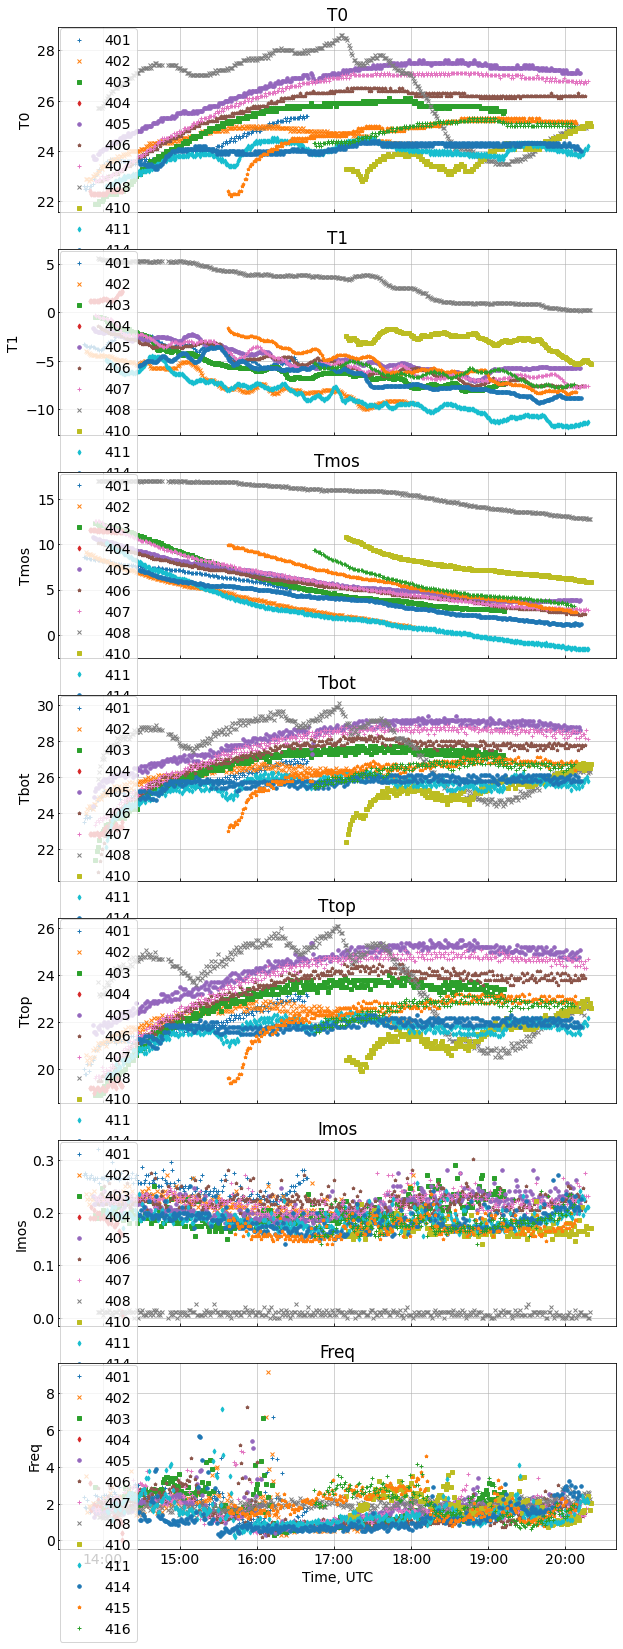

In [12]:
params = ['T0', 'T1', 'Tmos', 'Tbot', 'Ttop', 'Imos','Freq']
figs = len(params)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 4*figs))

for i, param in enumerate(params):
    plot_by_days(data, param, param, param, axn[i]) 
#plt.savefig("2020_04_sit_telemetry.png", dpi=300,  bbox_inches='tight')

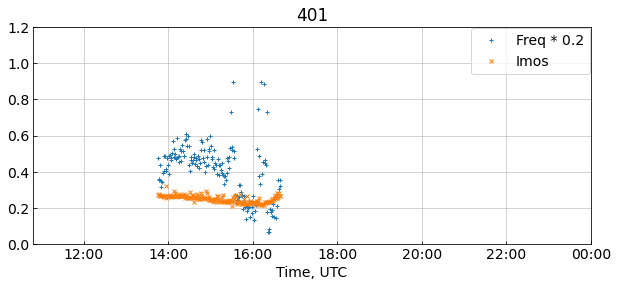

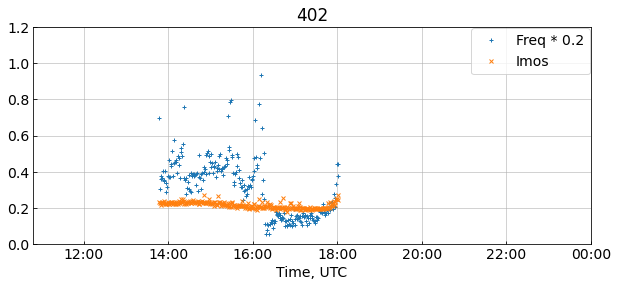

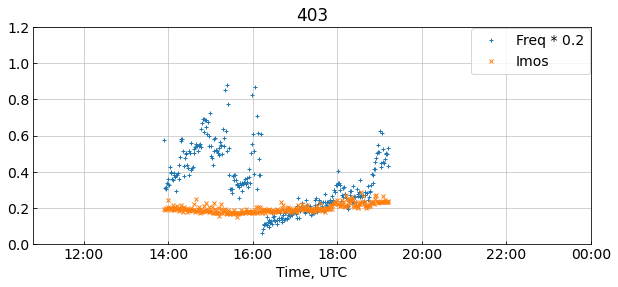

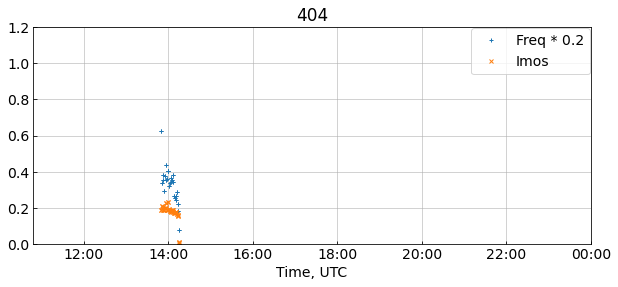

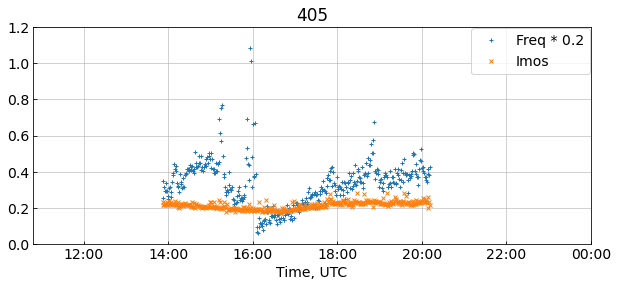

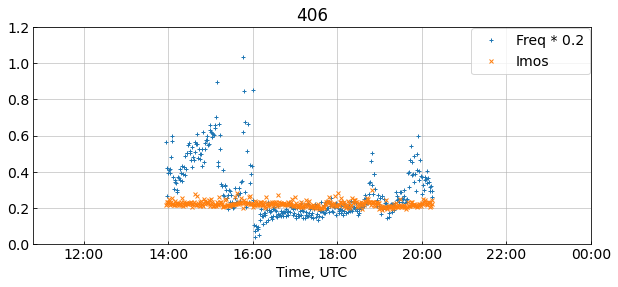

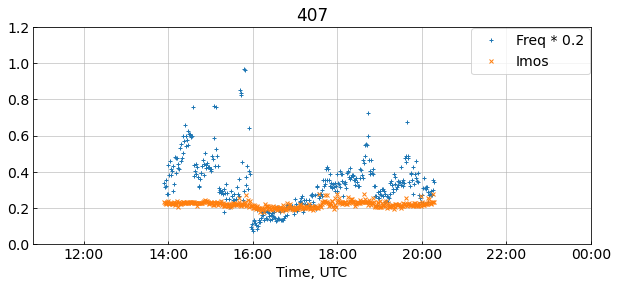

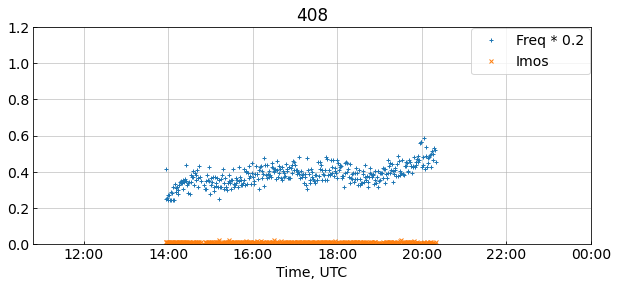

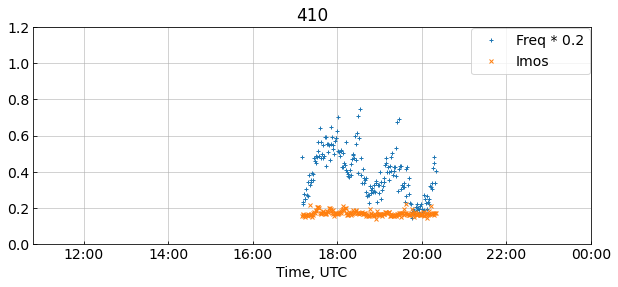

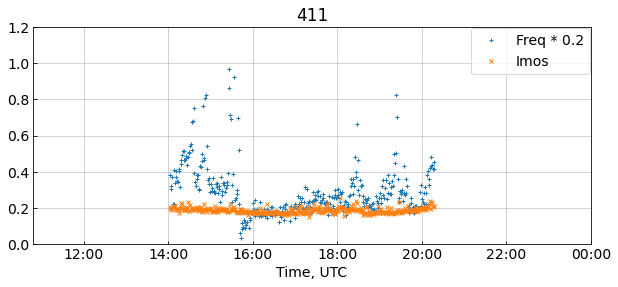

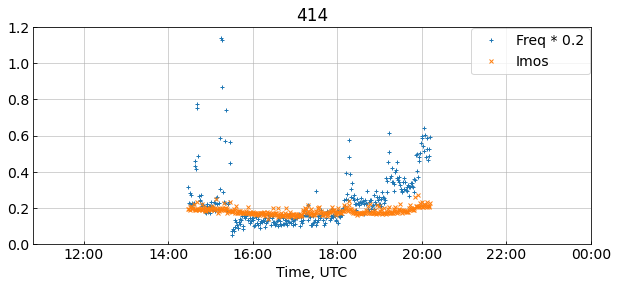

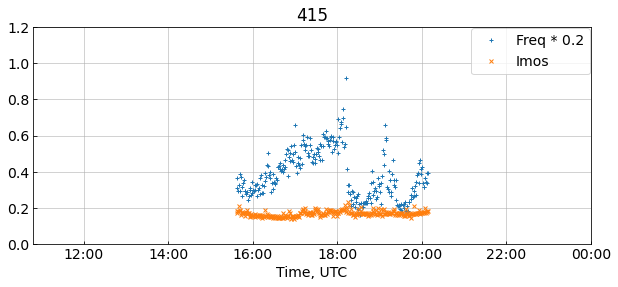

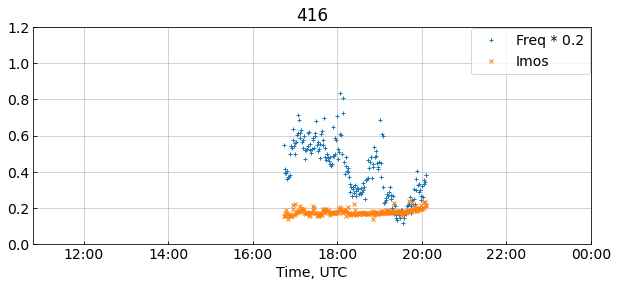

In [13]:
def plot_freq_for_days(array, flight, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    array = array
    grp = array[array.flight == flight]
    fig, ax = plt.subplots(figsize=(10,4))
    
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    plt.ylim(0.0, 1.2)
    #plt.xlim()
    #print(ax.get_xlim())
    #ax.set_xlim(np.array([-0.1, 0.1])+ax.get_xlim())
    ax.set_xlim((693596.45,693597))

    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data[data.month == month].groupby(['flight'])):
    #print(int(key))
    plot_freq_for_days(grp, key, "", key)

Text(0.5, 0, 'Time, UTC')

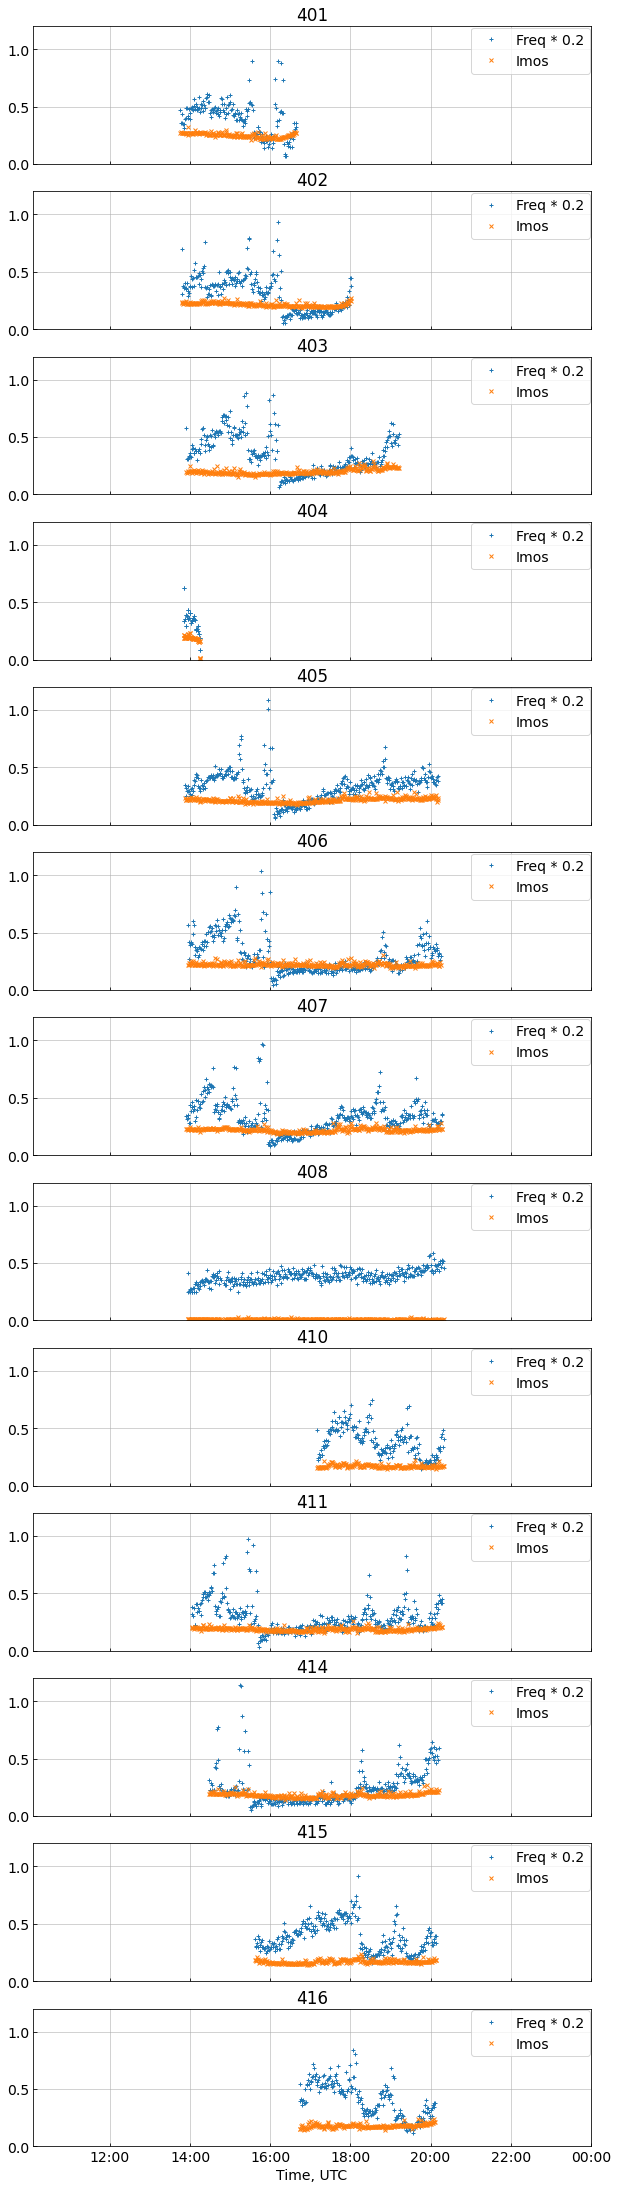

In [14]:
def plot_freq_and_imos_for_days(array, flight, axistext, titletext='', axis=None):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']

    grp = array[array.flight == flight]
    grp = grp[(np.isnan(grp.Freq)) == False]
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
    if(len(x) == 0):
        return
    
    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis
    
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    #ax.set_xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    ax.set_ylim(0., 1.2)
    ax.set_xlim((693596.42,693597))    
    ax.legend(borderaxespad=0.1)
    ax.grid()


########################
flights = []
for key, grp in (data[data.month == month].groupby(['flight'])):
    flights.append(key)
            
figs = len(flights)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 3 * figs))

for i, key in enumerate(flights):
    plot_freq_and_imos_for_days(data, key, "", key, axn[i])
plt.xlabel("Time, UTC")
#plt.savefig("2021_04_curr_and_freq.png", dpi=300,  bbox_inches='tight')